#Import Libraries

In [ ]:
import sklearn
from sklearn.datasets import fetch_openml
import random

In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score       #estimates the expected accuracy of your model on out-of-training data

#Load Data

In [ ]:
mnist = fetch_openml('mnist_784')
mnist

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 
      

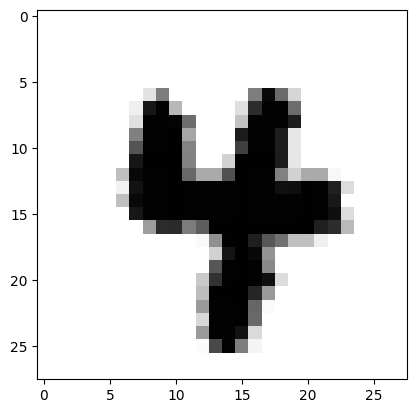

In [ ]:
import pandas as pd


x, y = mnist['data'], mnist['target']
x = x.to_numpy()
random_digit = x[random.randint(1,10000)]
some_random_digit = random_digit.reshape(28,28)
plt.imshow(some_random_digit, cmap = matplotlib.cm.binary)

In [ ]:
x_train, x_test = x[:60000], x[60000:70000]
y_train, y_test = y[:60000], y[60000:70000]

shuffle_index = np.random.permutation(60000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

#Define Model

In [ ]:
model = LogisticRegression(tol=0.1, max_iter=2000) #tol is the tolerance for the stopping criteria. if the value of tol is too big, the algorithm stops before it can converge.
                                                    #max-iter: Maximum number of iterations taken for the solvers to converge

In [ ]:
y_train.shape

(60000,)

#Train Model

In [ ]:
model.fit(x_train, y_train)       #This step takes a lot of time. Around 10 mins

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=2000, tol=0.1)

#Find the Output

Select and number between 1 and 10,000 to select the image:8000


Text(0.5, 0, 'The image has been classified as: 4')

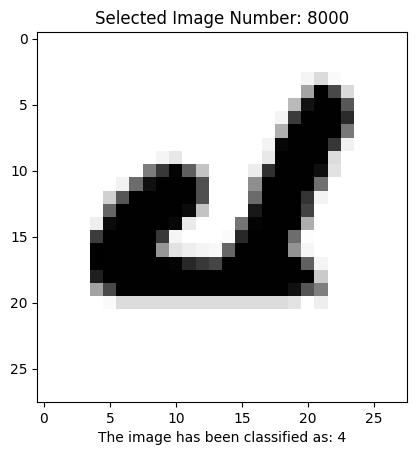

In [ ]:
test_num = int(input('Select and number between 1 and 10,000 to select the image:'))
test_image_data = x_test[test_num]
test_image = test_image_data.reshape(28,28)

prediction = model.predict([test_image_data])

plt.imshow(test_image,cmap = matplotlib.cm.binary)
plt.title(f'Selected Image Number: {test_num}')
plt.xlabel(f'The image has been classified as: {prediction[0]}')